In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS

import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) 
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [8]:
compas = pd.read_csv("Compas.csv")
compas = compas.drop(compas.columns[0], axis = 1)
nc = compas.drop(["first","decile_score.1","id","last","v_score_text","score_text","v_decile_score"], axis = 1)
nc = pd.get_dummies(nc)
nc = nc.rename(columns ={'race_African-American':"race_African_American", 'race_Native American': "race_Native_American"})
targetvariable = "decile_score"
independentvariables = nc.drop(columns=[targetvariable, "decile_score"]).columns
independentvariables

Index(['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'is_recid', 'is_violent_recid', 'sex_Female',
       'sex_Male', 'age_cat_25 - 45', 'age_cat_Greater than 45',
       'age_cat_Less than 25', 'race_African_American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native_American',
       'race_Other'],
      dtype='object')

In [9]:
def evaluate_model(estimator):
    cv_results = cross_validate(estimator,
                    X = nc[independentvariables],
                    y = nc[targetvariable],
                    scoring="neg_mean_absolute_error",
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).abs().mean().to_dict()

In [10]:
def display_results(results):
    results_df  = pd.DataFrame(results).T
    results_cols = results_df.columns
    for col in results_df:
        results_df[col] = results_df[col].apply(np.mean)
    return results_df

In [11]:
from mlxtend.regressor import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier

from xgboost import XGBRegressor, XGBClassifier


In [12]:
estimator_bagging  = BaggingClassifier(n_estimators=5, random_state=42) #  DTs
estimator_randomforest = RandomForestClassifier(n_estimators=5, random_state=42)
estimator_adaboost = AdaBoostClassifier(n_estimators=5, random_state=42)
estimator_bagging_10 = BaggingRegressor(n_estimators=10)
estimator_bagging_100 = BaggingRegressor(n_estimators=100)
estimator_randomforest = RandomForestRegressor(n_estimators=100)
estimator_bagging_elnet = BaggingRegressor(n_estimators=100, 
                                           base_estimator=ElasticNet())
estimator_bagging_random_tree = BaggingRegressor(n_estimators=100,
                                    base_estimator=ExtraTreeRegressor())
estimator_adaboost = AdaBoostRegressor(n_estimators=100)
estimator_xgboost = XGBRegressor(n_estimators=500)


In [13]:
results = {}

In [14]:
results["Bagging"] = evaluate_model(estimator_bagging)
results["randomforest"] = evaluate_model(estimator_randomforest)
results['adaboost'] = evaluate_model(estimator_adaboost)
results["bagging_tree_10"] = evaluate_model(estimator_bagging_10)
results["bagging_tree_100"] = evaluate_model(estimator_bagging_100)
results["randomforest_100"] = evaluate_model(estimator_randomforest)
results["bagging_elnet"] = evaluate_model(estimator_bagging_elnet)
results["bagging_random_tree"] = evaluate_model(estimator_bagging_random_tree)
results["adaboost_100"]  = evaluate_model(estimator_adaboost)
results["xgboost_500"] = evaluate_model(estimator_xgboost)

display_results(results)

,fit_time,score_time,test_score,train_score
Bagging,0.084591,0.008188,2.052054,1.039551
randomforest,2.273906,0.265817,1.796902,1.153825
adaboost,0.626243,0.029158,1.980268,1.968503
bagging_tree_10,0.629907,0.042072,1.822067,1.176794
bagging_tree_100,3.662588,0.242897,1.799876,1.153764
randomforest_100,3.247223,0.215568,1.794184,1.154133
bagging_elnet,1.627801,0.128134,1.882809,1.882661
bagging_random_tree,3.937735,0.315338,1.793751,1.151600
adaboost_100,0.437042,0.023591,2.004349,1.992969
xgboost_500,11.028638,0.049462,1.674848,1.587261


# Predict Decile Score: African American

In [15]:

ncAfr = nc[nc.race_African_American == True]
targetvariable = "decile_score"
independentvariables = ncAfr.drop(columns=[targetvariable, "decile_score"]).columns

In [16]:
def evaluate_modelAfr(estimator):
    cv_results = cross_validate(estimator,
                    X = ncAfr[independentvariables],
                    y = ncAfr[targetvariable],
                    scoring="neg_mean_absolute_error",
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).abs().mean().to_dict()

In [17]:
resultsAfr = {}

In [18]:
resultsAfr["Bagging"] = evaluate_modelAfr(estimator_bagging)
resultsAfr["randomforest"] = evaluate_modelAfr(estimator_randomforest)
resultsAfr['adaboost'] = evaluate_modelAfr(estimator_adaboost)
resultsAfr["bagging_tree_10"] = evaluate_modelAfr(estimator_bagging_10)
resultsAfr["bagging_tree_100"] = evaluate_modelAfr(estimator_bagging_100)
resultsAfr["randomforest_100"] = evaluate_modelAfr(estimator_randomforest)
resultsAfr["bagging_elnet"] = evaluate_modelAfr(estimator_bagging_elnet)
resultsAfr["bagging_random_tree"] = evaluate_modelAfr(estimator_bagging_random_tree)
resultsAfr["adaboost_100"]  = evaluate_modelAfr(estimator_adaboost)
resultsAfr["xgboost_500"] = evaluate_modelAfr(estimator_xgboost)

display_results(resultsAfr).sort_values("test_score", ascending = True).head(2)

,fit_time,score_time,test_score,train_score
xgboost_500,7.235613,0.069155,1.903772,1.747582
bagging_random_tree,2.095725,0.229924,2.017450,1.337670


# Predict Decile Score: Caucasian

In [19]:
ncWh = nc[nc.race_Caucasian == True]
targetvariable = "decile_score"
independentvariables = ncWh.drop(columns=[targetvariable, "decile_score"]).columns

In [20]:
def evaluate_modelWh(estimator):
    cv_results = cross_validate(estimator,
                    X = ncWh[independentvariables],
                    y = ncWh[targetvariable],
                    scoring="neg_mean_absolute_error",
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).abs().mean().to_dict()

In [21]:
resultsWh = {}

In [22]:
resultsWh["Bagging"] = evaluate_modelWh(estimator_bagging)
resultsWh["randomforest"] = evaluate_modelWh(estimator_randomforest)
resultsWh['adaboost'] = evaluate_modelWh(estimator_adaboost)
resultsWh["bagging_tree_10"] = evaluate_modelWh(estimator_bagging_10)
resultsWh["bagging_tree_100"] = evaluate_modelWh(estimator_bagging_100)
resultsWh["randomforest_100"] = evaluate_modelWh(estimator_randomforest)
resultsWh["bagging_elnet"] = evaluate_modelWh(estimator_bagging_elnet)
resultsWh["bagging_random_tree"] = evaluate_modelWh(estimator_bagging_random_tree)
resultsWh["adaboost_100"]  = evaluate_modelWh(estimator_adaboost)
resultsWh["xgboost_500"] = evaluate_modelWh(estimator_xgboost)


display_results(resultsWh).sort_values("test_score", ascending = True).head(2)

,fit_time,score_time,test_score,train_score
xgboost_500,7.137783,0.048345,1.562073,1.375347
bagging_tree_100,2.876332,0.145332,1.648952,1.063982


# ^Decile Score Seems to Be More Easy to Predict for White Than Black

# Trying to Predict Race: Is this Person African American? 
## Definitely Didn't Work

In [24]:
ncBlWh = compas.drop(["first","decile_score.1","id","last","v_score_text","score_text",], axis = 1)
ncBlWh = pd.get_dummies(ncBlWh)
ncBlWh = ncBlWh.rename(columns ={'race_African-American':"race_African_American", 'race_Native American': "race_Native_American"})
ncBlWh = ncBlWh[(ncBlWh.race_Caucasian == True) | (ncBlWh.race_African_American == True)]
ncBlWh = ncBlWh.drop(['race_Asian','race_Caucasian', 'race_Hispanic', 'race_Native_American','race_Other'], axis =1)

In [25]:
targetvariable = "race_African_American"
independentvariables = ncBlWh.drop(columns=[targetvariable]).columns

In [26]:
def evaluate_modelBlWh(estimator):
    cv_results = cross_validate(estimator,
                    X = ncBlWh[independentvariables],
                    y = ncBlWh[targetvariable],
                    scoring="accuracy",
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).abs().mean().to_dict()

In [27]:
resultsBlWh = {}

In [28]:
resultsBlWh["Bagging"] = evaluate_modelBlWh(estimator_bagging)


display_results(resultsBlWh).sort_values("test_score", ascending = True)

,fit_time,score_time,test_score,train_score
Bagging,0.373875,0.020798,0.595271,0.882299


In [29]:
from sklearn.model_selection import train_test_split
X_trainBlWh, X_testBlWh, y_trainBlWh, y_testBlWh = train_test_split(
     ncBlWh[independentvariables],
     ncBlWh[targetvariable], 
     test_size=0.2,
    random_state = 13,)

modelBlWh = LinearRegression()
modelBlWh.fit(X_trainBlWh, y_trainBlWh)

predictionsBlWh = modelBlWh.predict(X_testBlWh)

X = X_testBlWh.reset_index().copy() 
X["race_African_American"] = y_testBlWh.tolist()
X["prediction"] = predictionsBlWh

X["error"] = abs(X["race_African_American"]-X["prediction"])
res = X[["race_African_American","prediction","error"]]

res.error.describe()

count    1980.000000
mean        0.428450
std         0.165325
min         0.000022
25%         0.318598
50%         0.428171
75%         0.538064
max         0.919054
Name: error, dtype: float64

Yeah uh clearly this doesn't work this way

# How Good is Decile Score at Predicting Recidivism (By Race)?

# High Decile Score

In [31]:
PredHigh = compas.drop([ 'id', 'first', 'last', 'sex', 'age', 'age_cat', 
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count',  'is_violent_recid', 'v_decile_score',
       'v_score_text', 'decile_score.1'], axis =1)

PredHigh = PredHigh[(PredHigh.is_recid != -1)]
PredHigh = pd.get_dummies(PredHigh)
PredHigh = PredHigh.rename(columns ={'race_African-American':"race_African_American", 'race_Native American': "race_Native_American"})
PredHigh = PredHigh[(PredHigh.race_Caucasian == True) | (PredHigh.race_African_American == True)]
PredHigh = PredHigh.drop(['race_Asian','race_Caucasian', 'race_Hispanic', 'race_Native_American','race_Other', "score_text_Low", "score_text_Medium"], axis =1)



In [32]:
PredHigh.head()

,is_recid,race_African_American,score_text_High
2,1,1,0
3,1,1,0
4,0,1,1
7,1,0,0
9,0,0,0


In [33]:
PredBlHigh = PredHigh[(PredHigh.race_African_American == True)]
PredBlHigh = PredBlHigh.drop("race_African_American", axis = 1)

targetvariable = "is_recid"
independentvariables = PredBlHigh.drop(columns=[targetvariable]).columns

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(PredBlHigh[independentvariables], PredBlHigh[targetvariable])

AccuracyHighDecileScoreBlack = cross_val_score(tree, PredBlHigh[independentvariables],
                PredBlHigh[targetvariable], scoring="accuracy", 
                cv=3).mean()

In [34]:
PredWhHigh = PredHigh[(PredHigh.race_African_American == False)]
PredWhHigh = PredWhHigh.drop("race_African_American", axis = 1)
targetvariable = "is_recid"
independentvariables = PredWhHigh.drop(columns=[targetvariable]).columns

tree.fit(PredWhHigh[independentvariables], PredWhHigh[targetvariable])


AccuracyHighDecileScoreWhite = cross_val_score(tree, PredWhHigh[independentvariables],
                                           PredWhHigh[targetvariable], scoring="accuracy", 
                                           cv=3).mean()

In [35]:
DiffAcc = round(abs(AccuracyHighDecileScoreWhite - AccuracyHighDecileScoreBlack) *100,2)

In [36]:
print(f"A High Decile Score for White Criminals is {DiffAcc}% more accurate than Black Criminals")

A High Decile Score for White Criminals is 8.73% more accurate than Black Criminals


In [37]:
df = pd.DataFrame({"Race": ["Black", "White"],
                   'Accuracy': [AccuracyHighDecileScoreBlack, AccuracyHighDecileScoreWhite],
                   })
                   

(0.58, 0.725)

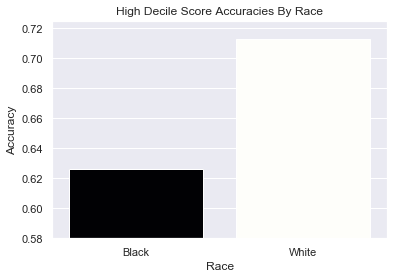

In [38]:
colors = [ "#000005","#FFFFF9" ]
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_palette(sns.color_palette(colors))

fig = sns.barplot(data = df,x = "Race", y= "Accuracy", palette=customPalette)
fig.set(xlabel='Race', ylabel='Accuracy', Title = "High Decile Score Accuracies By Race")
plt.ylim(.58, .725)

In [39]:
### Jk I know that's not allowed

(0, 0.8)

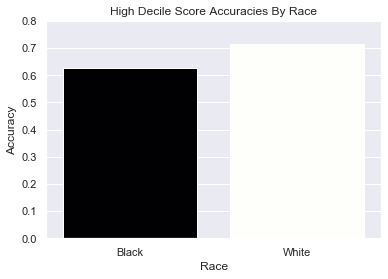

In [40]:
fig = sns.barplot(data = df,x = "Race", y= "Accuracy", palette=customPalette)
fig.set(xlabel='Race', ylabel='Accuracy', Title = "High Decile Score Accuracies By Race")
plt.ylim(0, .8)

In [41]:
# Low

In [43]:
PredLow = compas.drop([ 'id', 'first', 'last', 'sex', 'age', 'age_cat', 
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count',  'is_violent_recid', 'v_decile_score',
       'v_score_text', 'decile_score.1'], axis =1)

PredLow = PredLow[(PredLow.is_recid != -1)]
PredLow = pd.get_dummies(PredLow)
PredLow = PredLow.rename(columns ={'race_African-American':"race_African_American", 'race_Native American': "race_Native_American"})
PredLow = PredLow[(PredLow.race_Caucasian == True) | (PredLow.race_African_American == True)]
PredLow = PredLow.drop(['race_Asian','race_Caucasian', 'race_Hispanic', 'race_Native_American','race_Other', "score_text_High", "score_text_Medium"], axis =1)
PredLow.score_text_Low = PredLow.score_text_Low.replace({0: 1, 1: 0})
PredLow.head(2)


,is_recid,race_African_American,score_text_Low
2,1,1,0
3,1,1,0


In [44]:
PredBlLow = PredLow[(PredLow.race_African_American == True)]
PredBlLow = PredBlLow.drop("race_African_American", axis = 1)

targetvariable = "is_recid"
independentvariables = PredBlLow.drop(columns=[targetvariable]).columns

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(PredBlLow[independentvariables], PredBlLow[targetvariable])

AccuracyLowDecileScoreBlack = cross_val_score(tree, PredBlLow[independentvariables],
                PredBlLow[targetvariable], scoring="accuracy", 
                cv=3).mean()
AccuracyLowDecileScoreBlack

0.6046173161651479

In [45]:
PredWhLow = PredLow[(PredLow.race_African_American == False)]
PredWhLow = PredWhLow.drop("race_African_American", axis = 1)
targetvariable = "is_recid"
independentvariables = PredWhLow.drop(columns=[targetvariable]).columns

tree.fit(PredWhLow[independentvariables], PredWhLow[targetvariable])


AccuracyLowDecileScoreWhite = cross_val_score(tree, PredWhLow[independentvariables],
                                           PredWhLow[targetvariable], scoring="accuracy", 
                                           cv=3).mean()
AccuracyLowDecileScoreWhite

0.714772092862401

In [46]:
DiffLowAcc = round(abs(AccuracyLowDecileScoreWhite - AccuracyLowDecileScoreBlack) *100,2)

In [47]:
print(f"A Low Decile Score for White Criminals is {DiffLowAcc}% more accurate than Black Criminals")

A Low Decile Score for White Criminals is 11.02% more accurate than Black Criminals


In [48]:
df = pd.DataFrame({"Race": ["Black", "White"],
                   'Accuracy': [AccuracyLowDecileScoreBlack, AccuracyLowDecileScoreWhite],
                   })
df

,Race,Accuracy
0,Black,0.604617
1,White,0.714772


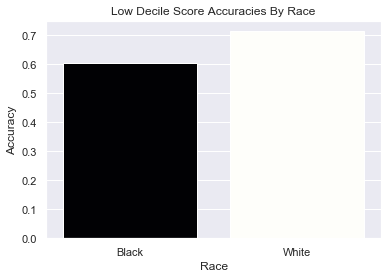

In [49]:
colors = [ "#000005","#FFFFF9" ]
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_palette(sns.color_palette(colors))

fig = sns.barplot(data = df,x = "Race", y= "Accuracy", palette=customPalette)
fig.set(xlabel='Race', ylabel='Accuracy', Title = "Low Decile Score Accuracies By Race")
fig
